In [1]:
%load_ext autoreload
%autoreload 2

2 1.5 60


<IPython.core.display.Javascript object>

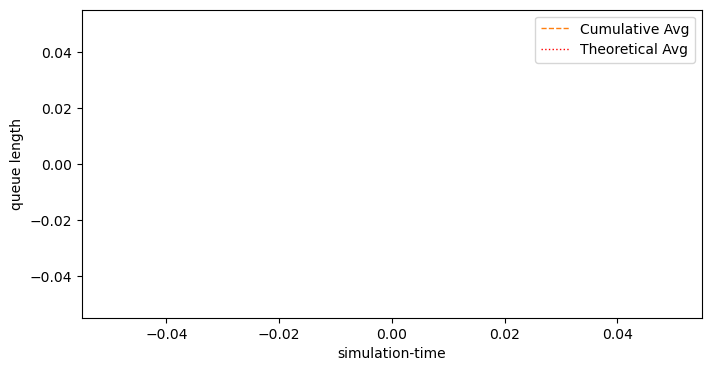

Simulation started at 0
chunk@0


In [11]:
%matplotlib notebook
import threading
from prototypes.request_response import RequestResponseSimulation
from sim.model.collaborator.request_response import Requestor, Responder

# 1️⃣ Create the simulation
mtbr = 2
service_time = 1.5
arrival_rate = 1/mtbr
service_rate = 1/service_time

mixing_time = round(10/(service_rate - arrival_rate))
print(mtbr, service_time, mixing_time)

sim = RequestResponseSimulation(
        requestor=lambda sim: Requestor(name="A", domain_context=sim, mean_time_between_requests=2),
        responder =  lambda sim: Responder(name="B", domain_context=sim, processing_time=1.5, capacity=1),
        until=20*mixing_time,
        realtime_factor=None
    )
# 3️⃣ run SimPy in a background thread so matplotlib can animate
               # calls env.run(until=…)
ani = sim.plot(interval=10, arrival_rate=arrival_rate, service_rate=service_rate)
threading.Thread(target=sim.step_simulation, daemon=True).start()


